In [1]:
from settings import *

random_rho0s: setting seed=97709


In [2]:
qubits = TriangularLayoutA(m=m, cutoff=1, distance=0.9)
operations = [("rz", "A"), ("rx", "A"), ("rz", "A"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=10)

<Axes: title={'center': 'Qubit layout'}>

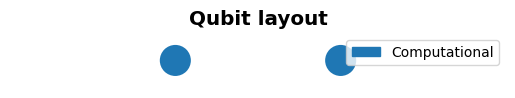

In [3]:
qubits.show_layout()

In [4]:
theta_opt, errors, thetas = optimize(circuit, training_data_short, n_grad=10, max_count=1000)

theta_opt = np.save("ham_theta_opt.npy", theta_opt)
thetas = np.save("ham_thetas.npy", thetas)
errors = np.save("ham_errors.npy", errors)

optimizer (optimization indices): setting seed=69969


C:\BFP\quantum-channel-approximation\q_channel_approx\optimizer.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  errors[i] = error


Iteration: 0 
            Max gradient term: 0.02412706860174807 
            Current gradient: [ 0.01098726  0.          0.          0.          0.          0.
 -0.00180963  0.          0.          0.          0.          0.
  0.          0.          0.01159753  0.          0.          0.
  0.          0.          0.          0.          0.01508442  0.
  0.          0.          0.          0.          0.          0.
  0.          0.02412707  0.          0.          0.          0.
  0.          0.          0.          0.          0.01552144  0.
  0.          0.          0.          0.          0.          0.
 -0.00494154  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.00979245  0.          0.01595282
  0.          0.          0.         -0.00313872] 
            Current error: 0.16409496809673763 
            Current sigma values: (0, 1, 10)
Iteration: 10 
            Max gradie

In [5]:
theta_opt = np.load("ham_theta_opt.npy")
thetas = np.load("ham_thetas.npy")
errors = np.load("ham_errors.npy")

In [6]:
theta_opt

array([ 0.8235234 ,  1.06131267,  0.67199149,  1.09020915,  0.97370256,
        0.7093097 ,  0.53496628,  0.98729084,  1.01914763,  0.89861582,
        0.94847739,  0.71256691,  1.07539897,  0.65410276,  0.89359066,
        0.97390208,  0.99130809,  0.65371621,  0.9474583 ,  0.91279812,
        0.80163862,  1.42517479,  0.77612098,  0.71659655,  0.9997702 ,
        1.26247099,  1.03115184,  0.91917687,  1.51922933,  0.86544918,
        0.8544481 ,  0.19890049,  1.24634959,  0.50707414,  0.56208718,
        1.60305267,  0.53890731,  0.87120245,  0.81432143,  0.94641446,
        0.81655114,  0.57033494,  0.86833318,  0.77379556,  0.89009646,
        0.72338184,  0.90269107,  0.51824522,  0.80709489,  1.35356624,
        0.884974  ,  0.68387676,  0.86928767,  0.42545269,  1.21568618,
        0.59355757,  1.0982185 ,  1.01832019,  0.31003163,  0.98400507,
        0.41147555,  1.14240025,  0.92436932,  0.4533377 ,  1.03145587,
        0.45633519,  0.99920337, -0.01354869,  1.59258931,  0.46

In [7]:
from q_channel_approx.unitary_circuits import unitary_circuit_fac

In [8]:
ham = unitary_circuit_fac(qubits, operations, repeats=1, depth=10)(theta_opt)
import qutip as qt
qt.Qobj(ham)

Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 7.17498596e-01-6.96344699e-01j -5.71044943e-03-6.61746365e-03j
  -1.07785770e-02-1.02627817e-02j  1.36440893e-03+2.46244358e-04j]
 [-6.42952384e-03-5.91008261e-03j  7.17568530e-01-6.96265593e-01j
  -3.38805211e-05-4.92836519e-04j -1.09648527e-02-1.06248956e-02j]
 [-9.92020773e-03-1.10785761e-02j -6.91535003e-04+1.24380617e-04j
   7.17624080e-01-6.96215565e-01j -6.23013887e-03-6.25405259e-03j]
 [ 2.86434928e-05+1.55263350e-03j -1.03898418e-02-1.11707533e-02j
  -6.11477691e-03-6.35845297e-03j  7.10508596e-01-7.03466111e-01j]]

In [9]:
from q_channel_approx.physics_defns import create_hamiltonian
create_hamiltonian(system)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.  0.2 0.3 0. ]
 [0.2 0.  0.  0.3]
 [0.3 0.  0.  0.2]
 [0.  0.3 0.2 0.2]]

In [10]:
np.sum(ham.dot(ham.conj().T) - np.identity(2**m) )# check if unitary

(-5.35758503533712e-15+0j)

c:\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

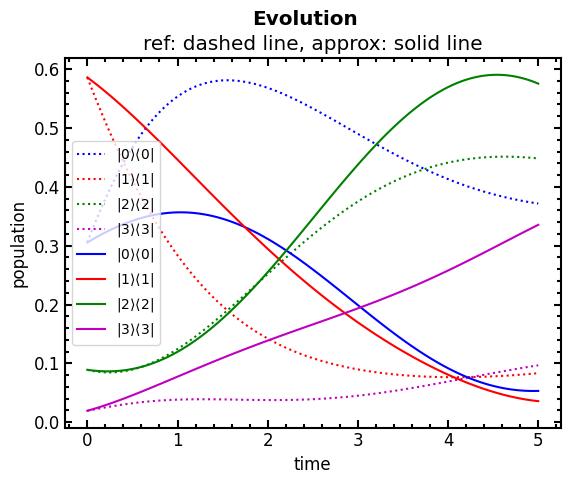

In [11]:
rho0 = rho_rand_haar(m, 5)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(100, rho0.full())

Os = [O.full() for O in create_observables_comp_basis(m)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.05, N=100, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(m))

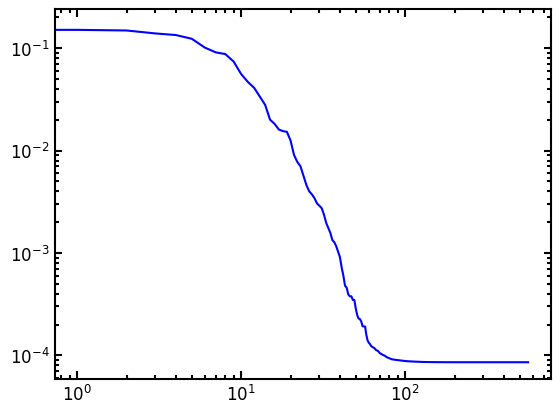

In [12]:
plt.loglog(errors)